In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from scipy import ndimage

In [2]:
num_px = 64
train_x = np.zeros((25000, num_px*num_px*3))
train_y = np.zeros((25000, 1))
index = 0
for _, _, files in os.walk('train'):
    for pic_file in files:
        if index % 1000 == 0:
            print 'reading %d pics' % index
        image = np.array(ndimage.imread('train/'+pic_file, flatten=False))
        image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
        train_x[index,:] = image.T
        if pic_file.startswith('dog'):
            train_y[index,0] = 1
        else:
            train_y[index,0] = 0
        index += 1
train_x /= 255

reading 0 pics
reading 1000 pics
reading 2000 pics
reading 3000 pics
reading 4000 pics
reading 5000 pics
reading 6000 pics
reading 7000 pics
reading 8000 pics
reading 9000 pics
reading 10000 pics
reading 11000 pics
reading 12000 pics
reading 13000 pics
reading 14000 pics
reading 15000 pics
reading 16000 pics
reading 17000 pics
reading 18000 pics
reading 19000 pics
reading 20000 pics
reading 21000 pics
reading 22000 pics
reading 23000 pics
reading 24000 pics


In [ ]:
import random
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm

#model = LogisticRegression(C=100.0)
#model = svm.SVC()
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 10), max_iter=200, random_state=1)
print(model)
indexs = range(25000)
random.shuffle(indexs)
pos = int(25000 * 0.99)
features_train = train_x[indexs[:pos],:]
features_dev = train_x[indexs[pos:],:]
labels_train = train_y[indexs[:pos],:]
labels_dev = train_y[indexs[pos:],:]
model.fit(features_train, labels_train)
print('nn train accuracy: %f' % float(100 * model.score(features_train, labels_train)))
print('nn dev accuracy: %f' % float(100 * model.score(features_dev, labels_dev)))

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
test_x = np.zeros((12500, num_px*num_px*3))
test_y = np.zeros((12500, 1))
index = 0
ids = []
for _, _, files in os.walk('test'):
    for pic_file in files:
        if index % 1000 == 0:
            print 'reading %d pics' % index
        image = np.array(ndimage.imread('test/'+pic_file, flatten=False))
        image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
        test_x[index,:] = image.T
        ids.append(pic_file[:len(pic_file)-4])
        index += 1
test_x /= 255
test_y = model.predict_proba(test_x)
subb = pd.DataFrame({
        "id": ids, 
        "label": test_y[:,1]
    })
subb.to_csv('subbmission.csv', index=False)

reading 0 pics
reading 1000 pics
reading 2000 pics
reading 3000 pics
reading 4000 pics
reading 5000 pics
reading 6000 pics
reading 7000 pics
reading 8000 pics
reading 9000 pics
reading 10000 pics
reading 11000 pics
reading 12000 pics


In [29]:
print test_y[0:10, :]

[[ 0.15322559  0.84677441]
 [ 0.30110741  0.69889259]
 [ 0.36637611  0.63362389]
 [ 0.11178138  0.88821862]
 [ 0.37087907  0.62912093]
 [ 0.44718314  0.55281686]
 [ 0.24648364  0.75351636]
 [ 0.83142799  0.16857201]
 [ 0.79372759  0.20627241]
 [ 0.94008083  0.05991917]]


test/7073.jpg
(375, 499, 3)
cat


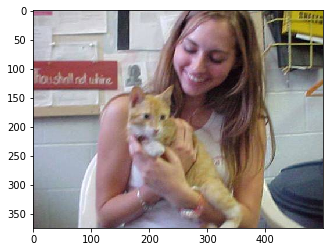

In [9]:
sample_pic = 'test/' + ids[random.randint(0, len(ids)-1)] + '.jpg'
print sample_pic
image = np.array(ndimage.imread(sample_pic, flatten=False))
print image.shape
sample_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
label = model.predict(sample_image.T)
print 'dog' if label[0]==1 else 'cat'
plt.imshow(image)
plt.show()

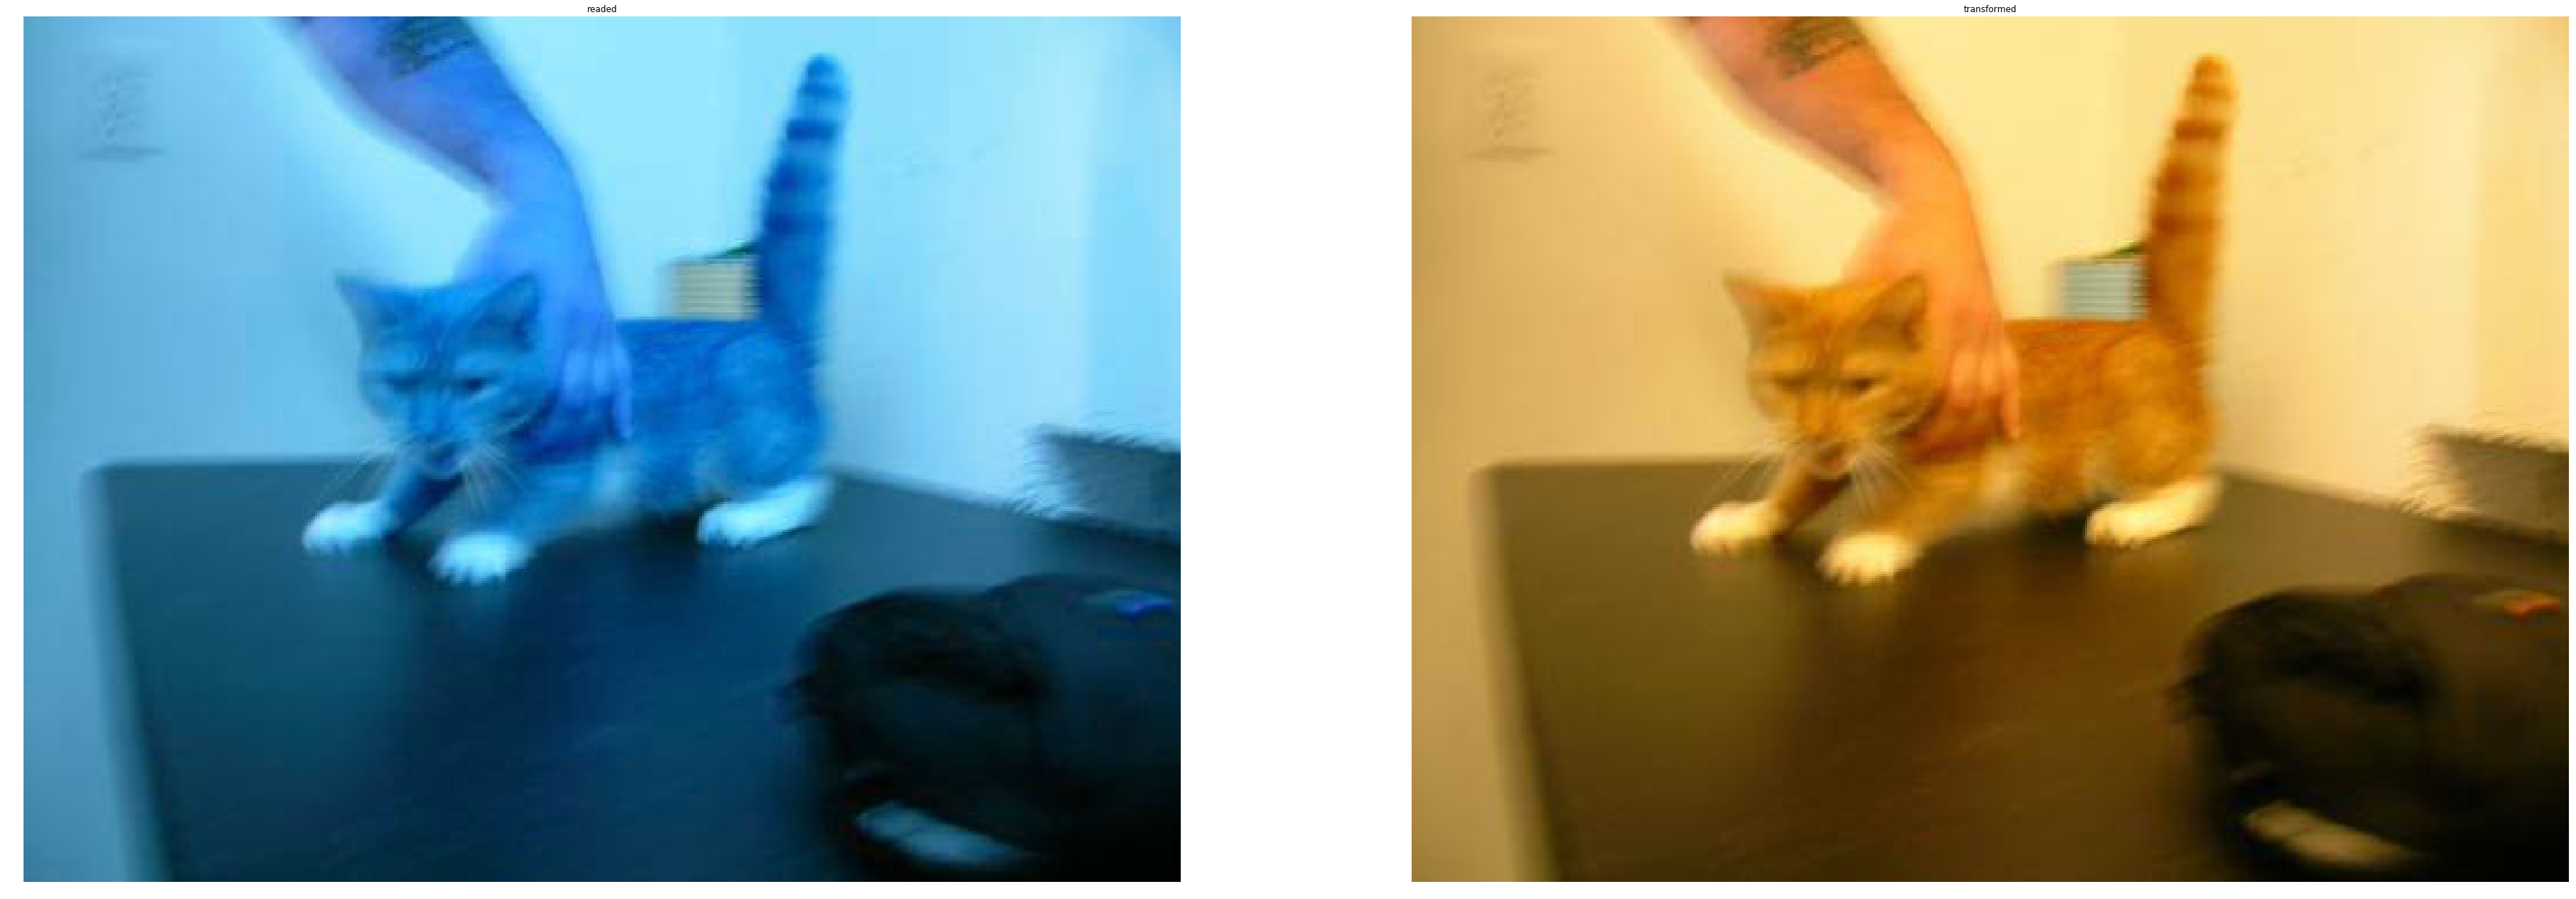

<class 'matplotlib.axes._subplots.AxesSubplot'>


In [16]:
import cv2
f, axarr = plt.subplots(1, 2, figsize=(64, 64))
img =cv2.imread('train/cat.0.jpg')
axarr[0].imshow(img)
axarr[0].set_title('readed')
axarr[0].axis('off')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axarr[1].imshow(img)
axarr[1].set_title('transformed')
axarr[1].axis('off')
plt.show()
print type(axarr[0])